# Analyz the business metrics of Yandex.Afisha, an app that helps users find out about events like movie showings, exhibitions, gigs, etc. and buy tickets.

by Yotam dadon, Marketing growth data analyst.
- LinkedIn- <a href = "https://www.linkedin.com/in/yotamdadon/">Click here for linkedIn</a>
- Facebook- <a href = "https://www.facebook.com/yotamdadon/">Click here for FaceBook</a>
- Email- <a href = "mailto: ytmddn@gmail.com">ytmddn@gmail.com</a>





## project goals:

- Product: How people use the product
- Sales: When they start to buy
- Marketing: How much money each customer brings
- Marketing: When they pay off
___________

# Table of Contents

- [Step 1.The data and its analysis preparation.](#chapter1)

- [Step 2.Make reports and calculate metrics.](#chapter2)
    - [Product](#section_1)
        - [How many people use it every day, week, and month?](#section_1_1)
        - [What is the length of each session?](#section_1_2)
        - [How often do users come back?](#section_1_3)
    - [Sales](#section_2)
        - [When do people start buying?](#section2_1)
        - [How many orders do they make during a given period of time?](#section_2_2)
        - [What is the average purchase size?](#section_2_3)
        - [How much money do they bring? (LTV)](#section_2_4)
    - [Marketing](#section_3)
        - [How much money was spent? Overall/per source/over time](#section_3_1)
        - [How much did customer acquisition from each of the sources cost?](#section_3_2)
        - [How worthwhile where the investments? (ROI)](#section_3_3)
        
        

- [Step 3. Conclusion: How much money to invest and where.](#chapter3)

## Step 1. Download the data and prepare it for analysis <a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:

!jupyter nbconvert  Business_analytics.ipynb --to html

[NbConvertApp] Converting notebook Business_analytics.ipynb to html
[NbConvertApp] Writing 1517951 bytes to Business_analytics.html


In [3]:
#import the tables
VISITS_PATH_LOCAL = '/Users/yotamdadon/Downloads/visits_log_us.csv'
ORDERS_PATH_LOCAL = '/Users/yotamdadon/Downloads/orders_log_us.csv'
COSTS_PATH_LOCAL = '/Users/yotamdadon/Downloads/costs_us.csv'

VISITS_PATH_ONLINE = '/datasets/visits_log_us.csv'
ORDERS_PATH_ONLINE = '/datasets/orders_log_us.csv'
COSTS_PATH_ONLINE = '/datasets/costs_us.csv'     

try:
    visits = pd.read_csv(VISITS_PATH_LOCAL)
    orders = pd.read_csv(ORDERS_PATH_LOCAL)
    costs = pd.read_csv(COSTS_PATH_LOCAL)
except:
    visits = pd.read_csv(VISITS_PATH_ONLINE)
    orders = pd.read_csv(ORDERS_PATH_ONLINE)
    costs = pd.read_csv(COSTS_PATH_ONLINE)

visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()



In [4]:
#lets checkout how they look
display(visits.head())
display(orders.head())
display(costs.head())
display('visits: ',visits.isnull().sum())
display('orders: ', orders.isnull().sum())
display('costs: ', costs.isnull().sum())

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


'visits: '

device       0
end ts       0
source id    0
start ts     0
uid          0
dtype: int64

'orders: '

buy ts     0
revenue    0
uid        0
dtype: int64

'costs: '

source_id    0
dt           0
costs        0
dtype: int64

## Step 2: Make reports and calculate metrics
 <a class="anchor" id="chapter2"></a>

# Product<a class="anchor" id="Section_1"></a>
---------



## How many people use it every day, week, and month?


In [5]:
#let the jupyter know it is date and not string
visits['start ts'] = pd.to_datetime(visits['start ts'])
visits['end ts'] = pd.to_datetime(visits['end ts'])
#elaborate on seesion times by creating more columns 
visits['session_year']  = visits['start ts'].dt.year
visits['session_month'] = visits['start ts'].dt.month
visits['session_week']  = visits['start ts'].dt.week
visits['session_date'] = visits['start ts'].dt.date
dau = visits.groupby(
    ['session_year', 'session_month', 'session_week', 'session_date']).agg(
    {'uid': 'nunique'}).reset_index()
wau = visits.groupby(
    ['session_year', 'session_week']).agg({'uid': 'nunique'}).reset_index()
mau = visits.groupby(
    ['session_year', 'session_month']).agg({'uid': 'nunique'}).reset_index()

dau.rename(columns = {'uid':'dau'}, inplace=True)
wau.rename(columns = {'uid':'wau'}, inplace=True)
mau.rename(columns = {'uid':'mau'}, inplace=True);

dau_tot = dau.mean()['dau']
print('daily active users:',int(dau_tot))
wau_tot = wau.mean()['wau']
print('weekly active users:',int(wau_tot))
mau_tot = mau.mean()['mau']
print('monthly active users:',int(mau_tot))



<ipython-input-5-c354b8971264>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visits['session_week']  = visits['start ts'].dt.week


daily active users: 907
weekly active users: 5716
monthly active users: 23228


In [6]:
dauwaumau = dau.merge(
    wau, 
    on=['session_year','session_week'], 
    how='left').merge(
    mau,
    on=['session_year','session_month'], 
    how='left')

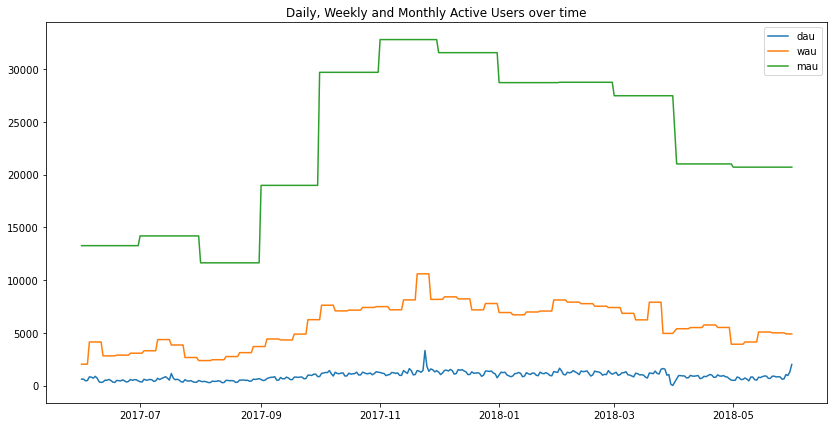

In [7]:
plt.figure(figsize=(14,7))
plt.plot('session_date', 'dau', data=dauwaumau)
plt.plot('session_date', 'wau', data=dauwaumau)
plt.plot('session_date', 'mau', data=dauwaumau)
plt.title('Daily, Weekly and Monthly Active Users over time')
plt.legend();

<div class="alert alert-success">
    
## Conclusion:
    Daily active users: 907
    Weekly active users: 5716
    Monthly active users: 23228

</div>

## How many sessions are there per day? (One user might have more than one session.)



In [8]:
sessions_per_day = visits.groupby('session_date').agg({'session_date':'count'})
sessions_per_day.columns = ['n_sessions']
sessions_per_day_mean = sessions_per_day.mean()
print('sessions per day: ', int(sessions_per_day_mean))

sessions per day:  987


In [9]:
sessions_per_day.describe()

,n_sessions
count,364.000000
mean,987.362637
std,418.994796
min,1.000000
25%,635.500000
50%,1003.000000
75%,1280.000000
max,4042.000000


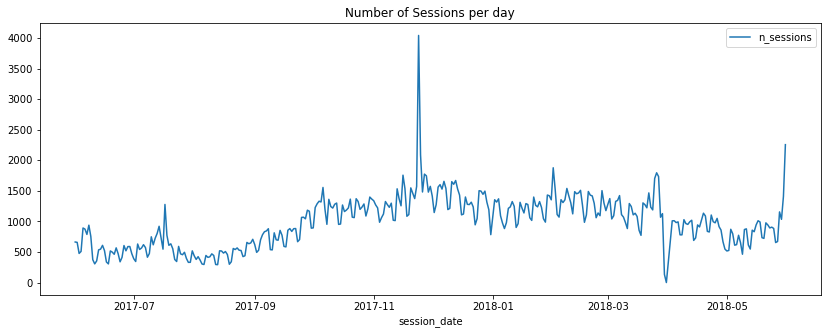

In [10]:
sessions_per_day.plot(figsize=(14,5))
plt.title('Number of Sessions per day');

This plot shows the number of sessions per day over time, from june 2017 to may 2018. A specific peak can be seen in the end November 2017.

<div class="alert alert-success">

## Conclusions
    • Average number of sessions per day: 987
    • The number of sessions per day range from ~600 to ~1300
</div>

## What is the length of each session?
Since the distribution of the sessions length is not normal (as seen in the histogram), we can find the average session length using 'mode' insted of 'mean' or 'median'.



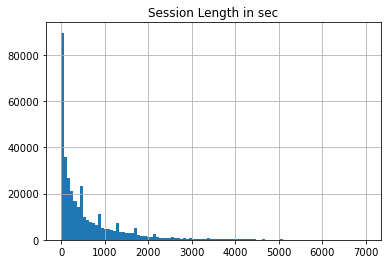

In [11]:
visits['session_length_sec'] = (visits['end ts'] - visits['start ts']).dt.seconds
visits['session_length_sec'].hist(bins=100,range=(0,7000))
plt.title('Session Length in sec');


In [12]:
print('mean session length:',visits['session_length_sec'].mean(),'sec')
print('median session length:',visits['session_length_sec'].median(),'sec')
print('mode session length:',visits['session_length_sec'].mode()[0],'sec')

mean session length: 643.506488592098 sec
median session length: 300.0 sec
mode session length: 60 sec


<div class="alert alert-success">

### Conclusions
    The length of each session is around 60 seconds
</div>

### How often do users come back?<a class="anchor" id="section1_3"></a>

We have two metrics to answer this question - sticky factors (weekly and monthly) and retention rate:

* Sticky factor shows the regularity of the users visits. If all users visit every day, then  DAU and MAU (or WAU) are equal and the sticky factor equals 100%. If every user logged only once a month, the sticky factor equals 3.3%. The higher the factor, the more frequet the users visits.
* Retention rate is the percentage of users that continue using our product over a period of time.

In [13]:

sticky_wau = (dau_tot / wau_tot)*100
sticky_mau = (dau_tot / mau_tot)*100
print('weekly sticky factor:',int(sticky_wau),'%')
print('monthly sticky factor:',int(sticky_mau),'%')

weekly sticky factor: 15 %
monthly sticky factor: 3 %


In [14]:
dauwaumau['sticky_wau'] = (dauwaumau['dau'] / dauwaumau['wau'])*100
dauwaumau['sticky_mau'] = (dauwaumau['dau'] / dauwaumau['mau'])*100

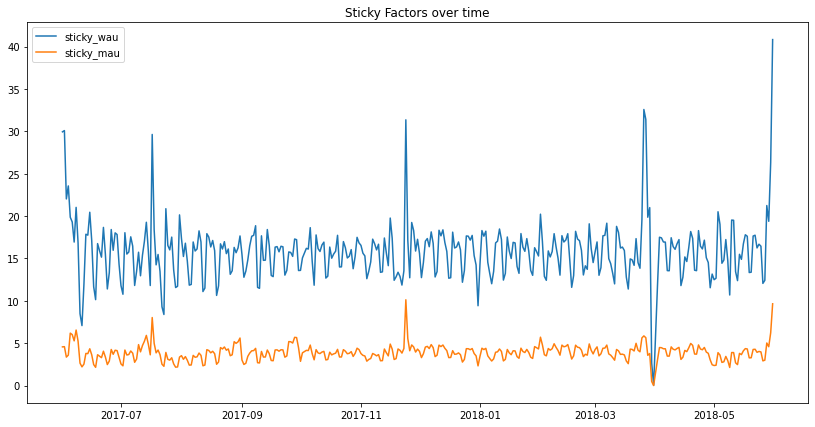

In [15]:
plt.figure(figsize=(14,7))
plt.plot('session_date', 'sticky_wau', data=dauwaumau)
plt.plot('session_date', 'sticky_mau', data=dauwaumau)
plt.title('Sticky Factors over time')
plt.legend();

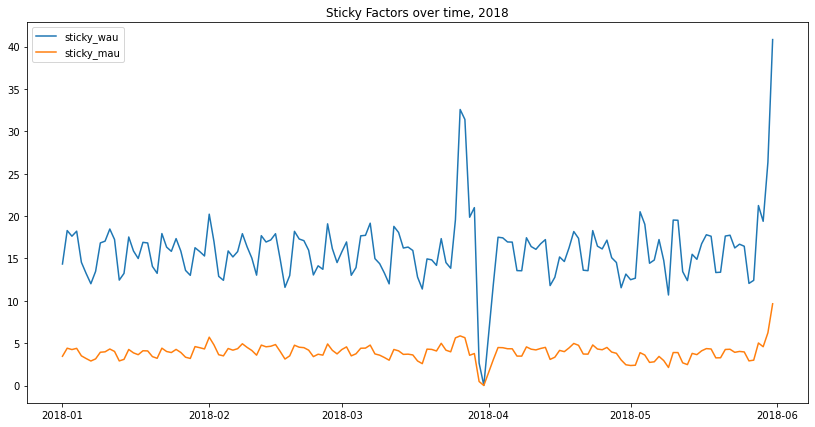

In [16]:
# LET'S TAKE A CLOSER LOOK JUST AT 2018

dauwaumau_crop = dauwaumau.query('session_year == 2018')
plt.figure(figsize=(14,7))
plt.plot('session_date', 'sticky_wau', data=dauwaumau_crop)
plt.plot('session_date', 'sticky_mau', data=dauwaumau_crop)
plt.title('Sticky Factors over time, 2018')
plt.legend();

These plots show the value of Sticky factors over time. Excluding specific peaks, we can that both factors remain steady during the entire period.

In [17]:
#Define first visits and create a period
first_visit_date = visits.groupby('uid')['start ts'].min()
first_visit_date.name = 'first_visit_date'
visits = visits.join(first_visit_date,on='uid') 

print(visits.head())

    device              end ts  source id            start ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   
2   7459035603376831527          2017              7            26   
3  16174680259334210214          2018              5            20   
4   9969694820036681168          2017             12            52   

  session_date  session_length_sec    first_visit_date  
0   2017-12-20                1080 2017-12-20 17:20:00  
1   2018-02-19                1680 2018-02-19 16:53:00  
2   2017-07-01   

In [18]:
#Form monthly cohorts
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')
visits['visit_month'] = visits['start ts'].astype('datetime64[M]')
display(visits.head()) 

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date,session_length_sec,first_visit_date,first_visit_month,visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01


Usualy users come back to the app evry [17.62100016975407] days


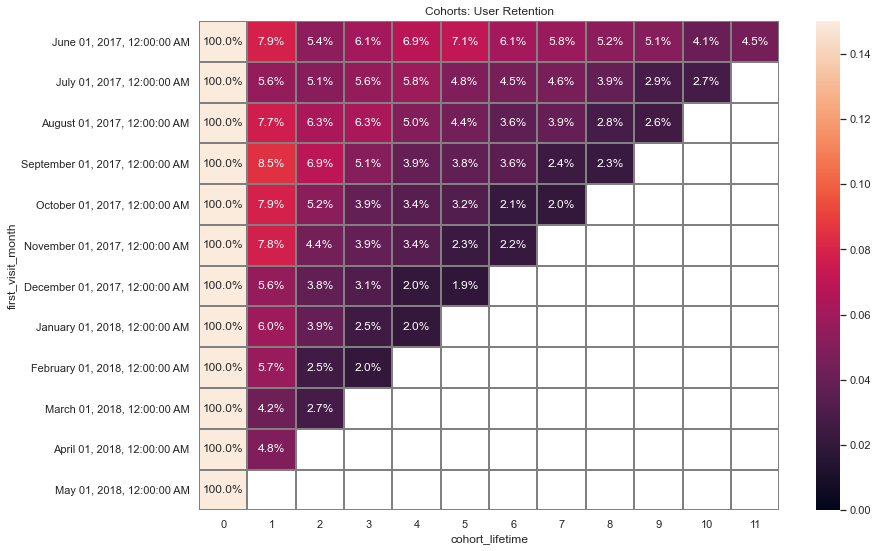

In [19]:

visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int) 

cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']].reset_index()
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

cohorts = cohorts.merge(initial_users_count,on='first_visit_month') 
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')


sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray',  yticklabels =retention_pivot.index.strftime('%B %d, %Y, %r'),vmin=0, vmax=0.15); 

come_back_rate = ([cohorts['retention'].median()* 365]) 
print('Usualy users come back to the app evry', come_back_rate, 'days')

<div class="alert alert-success">
    
### Cunclusion: 
    The retention rate is rather low and ranges between 2% and 8.5%
</div>

# Sales <br> <a class="anchor" id="section_2"></a>
--------

## When do people start buying?  <a class="anchor" id="section_2_1"></a>



Usually, it takes:  17.627158847319595  Days for users to purchase after regestration


,first_visit_date,first_purchase_date,time_taken_to_purchase
0,2018-03-09,2018-03-09,0.0
1,2018-03-09,2018-03-09,0.0
2,2017-09-03,2017-09-04,1.0
3,2017-09-03,2017-09-04,1.0
4,2017-09-03,2017-09-04,1.0
...,...,...,...
761802,2017-12-04,2017-12-04,0.0
761803,2017-11-20,2017-11-20,0.0
761804,2017-11-29,2017-11-29,0.0
761805,2018-04-23,2018-04-23,0.0


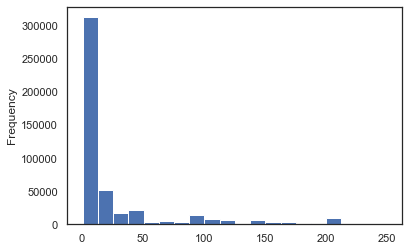

In [20]:
funnel = pd.merge(visits, orders, on = 'uid',how = 'inner')

first_purchase_date = funnel.groupby('uid')['buy ts'].min()
first_purchase_date.name = 'first_purchase_date'
funnel = funnel.join(first_purchase_date,on='uid') 
funnel['first_visit_date'] = funnel['first_visit_date'].astype('datetime64[D]')
funnel['first_purchase_date'] = funnel['first_purchase_date'].astype('datetime64[D]')

funnel['time_taken_to_purchase'] = funnel['first_purchase_date'] -funnel['first_visit_date']
funnel['time_taken_to_purchase'] = funnel['time_taken_to_purchase'] / np.timedelta64(1, 'D')
funnel['time_taken_to_purchase'].plot.hist(bins = 20,range=[1,250])
print('Usually, it takes: ', funnel['time_taken_to_purchase'].mean(),' Days for users to purchase after regestration')

display(funnel[['first_visit_date','first_purchase_date','time_taken_to_purchase']])


<div class="alert alert-success">
    
### Cunclusion:
    On average, it takes:  17  Days for users to purchase after regestration.
</div>

## How many orders do they make during a given period of time? <a class="anchor" id="section_2_2"></a>



In [21]:
orders['buy ts'] = pd.to_datetime(orders['buy ts'])
orders_numbers = orders

orders_numbers['order_year']  = orders_numbers['buy ts'].dt.year
orders_numbers['order_month'] = orders_numbers['buy ts'].dt.month
orders_numbers['order_week']  = orders_numbers['buy ts'].dt.week
orders_numbers['order_date'] = orders_numbers['buy ts'].dt.date

<ipython-input-21-d885e09bd847>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  orders_numbers['order_week']  = orders_numbers['buy ts'].dt.week


In [52]:
orders_per_day = orders_numbers.groupby('order_date').agg({'order_date': 'count'})
orders_per_day_mean = orders_per_day.mean()
print('Daily average number of orders:', int(orders_per_day_mean))

Daily average number of orders: 138


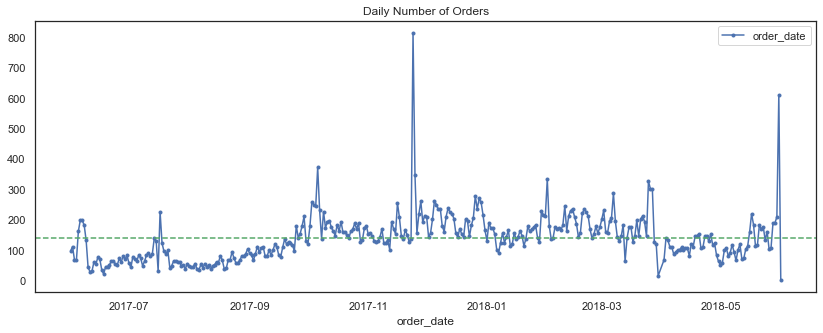

In [23]:
orders_per_day.plot(marker='.',linestyle='-',figsize=(14,5))
plt.axhline(y=int(orders_per_day_mean),linestyle='--',color='g')
plt.title('Daily Number of Orders');

In [55]:
orders_per_week = orders_numbers.groupby(['order_year','order_week']).agg({'order_date': 'count'})
orders_per_week_mean = orders_per_week.mean()
print('Weekly average number of orders:', int(orders_per_week_mean))

Weekly average number of orders: 951


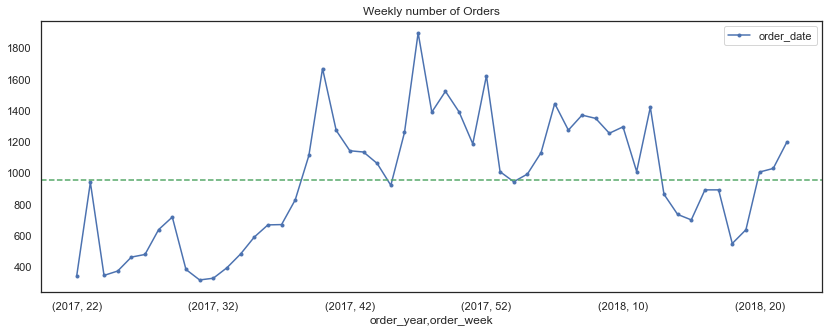

In [56]:
orders_per_week.plot(marker='.',linestyle='-',figsize=(14,5))
plt.axhline(y=int(orders_per_week_mean),linestyle='--',color='g')
plt.title('Weekly number of Orders');

In [58]:
orders_per_month = orders_numbers.groupby(
    ['order_year','order_month']).agg({'order_date': 'count'})
orders_per_month_mean = orders_per_month.mean()
print('Monthly average number of orders:', int(orders_per_month_mean))

Monthly average number of orders: 3878


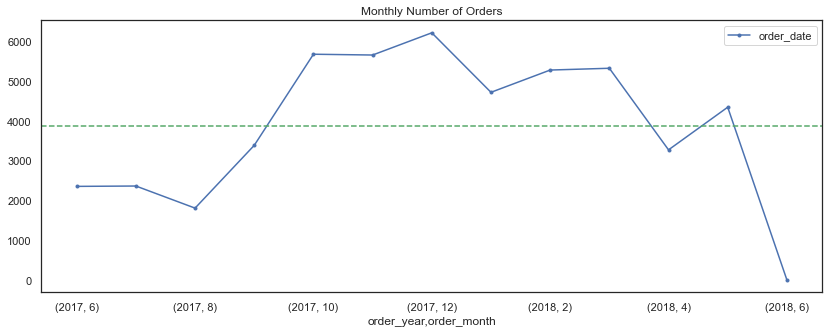

In [27]:
orders_per_month.plot(marker='.',linestyle='-',figsize=(14,5))
plt.axhline(y=int(orders_per_month_mean),linestyle='--',color='g')
plt.title('Monthly Number of Orders');

In [28]:
# WE CAN ALSO LOOK AT THE NUMBER OF UNIQUE BUYERS FOR EACH TIME PERIOD

buyers_per_day = orders_numbers.groupby('order_date').agg({'uid': 'nunique'}).mean()
buyers_per_week = orders_numbers.groupby(
    ['order_year','order_week']).agg({'uid': 'nunique'}).mean()
buyers_per_month = orders_numbers.groupby(
    ['order_year','order_month']).agg({'uid': 'nunique'}).mean()

print('daily mean number of unique buyers:', int(buyers_per_day))
print('weekly mean number of unique buyers:', int(buyers_per_week))
print('monthly mean number of unique buyers:', int(buyers_per_month))

daily mean number of unique buyers: 127
weekly mean number of unique buyers: 816
monthly mean number of unique buyers: 3155


In [29]:
# LETS PUT IT IN A NICE DATAFRAME

orders_df = {'orders': [int(orders_per_day_mean), 
                        int(orders_per_week_mean), int(orders_per_month_mean)],
             'buyers': [int(buyers_per_day), int(buyers_per_week), int(buyers_per_month)]}
    
orders_df = pd.DataFrame(orders_df, 
                         columns=['orders','buyers'], 
                         index=['daily','weekly','monthly'])

orders_df['order_per_user'] = orders_df['orders'] / orders_df['buyers']
display(orders_df)

,orders,buyers,order_per_user
daily,138,127,1.086614
weekly,951,816,1.165441
monthly,3878,3155,1.229160


<div class="alert alert-success">
    
## Conclusion:
    
    Lets put all our insight together in one table:    
    
            n_orders  n_buyers  order_per_user
    Daily       138     127  1.08
    Weekly      951     816  1.16
    Monthly    3878    3155  1.22

</div>


## What is the average purchase size? <a class="anchor" id="section_2_3"></a>


In [30]:
orders.head()

,buy ts,revenue,uid,order_year,order_month,order_week,order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,22,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,22,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,22,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,22,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,22,2017-06-01


The avargege purchase size is:  4.956901936821488


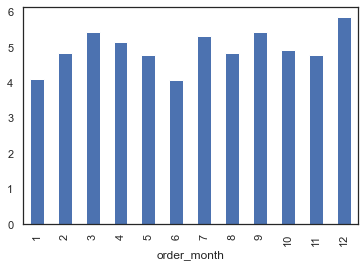

In [31]:
orders_by_purchase_size = orders.groupby(['order_month'])['revenue'].mean()
orders_by_purchase_size.plot(kind = 'bar')
print('The avargege purchase size is: ', orders_by_purchase_size.mean())


<div class="alert alert-success">


### Cunclusion:
    The avargege purchase size is:  4.95 Usd 
</div>

## How much money do they bring? (LTV) <a class="anchor" id="section_2_4"></a>

Lifetime-value indicates the gross profit we can expect from a single customer.

In [32]:
orders['order_month'] = orders['buy ts'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']


In [33]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
orders = pd.merge(orders,first_orders, on='uid')

In [34]:
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')



In [35]:
margin_rate = 0.4


report['gp'] =  report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['revenue'] / report['n_buyers']


In [36]:
result = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').cumsum(axis=1).round(3)


result

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724,5.210,5.647,6.602,7.625,8.360,9.311,9.892,10.445,11.051,11.622,11.879
2017-07-01,6.010,6.345,6.969,7.328,7.505,7.661,7.781,7.923,8.084,8.231,8.387,NaN
2017-08-01,5.277,5.749,6.207,6.598,7.092,7.376,7.587,7.992,8.284,8.472,NaN,NaN
2017-09-01,5.645,6.762,7.283,11.259,11.659,12.306,13.008,13.251,13.435,NaN,NaN,NaN
2017-10-01,5.004,5.539,5.731,5.888,6.040,6.160,6.245,6.360,NaN,NaN,NaN,NaN
2017-11-01,5.155,5.554,5.753,6.078,6.226,6.280,6.395,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738,4.999,5.924,6.989,7.302,7.640,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.136,4.430,4.735,4.877,4.940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.157,4.435,4.514,4.588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


96.64484085081587

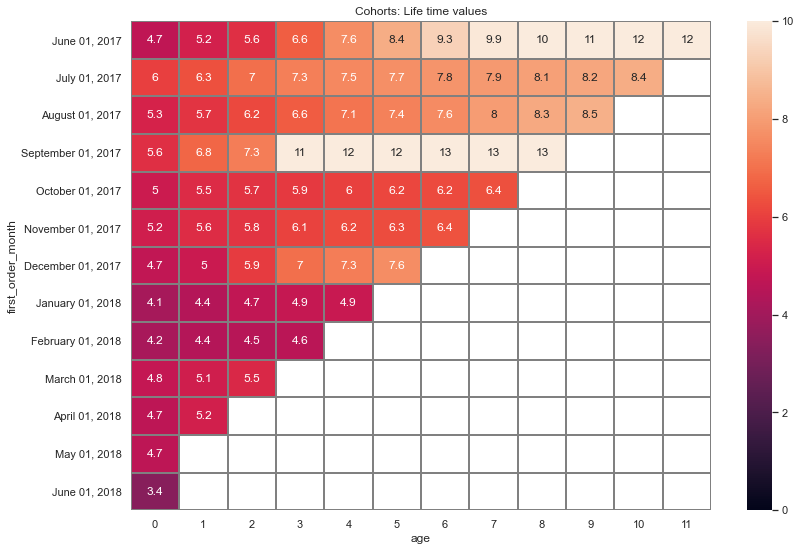

In [37]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Life time values')
sns.heatmap(result, annot=True, linewidths=1, yticklabels =result.index.strftime('%B %d, %Y'), linecolor='gray', vmin=0, vmax=10); 

result.loc['mean'] = result.mean()


Mean_ltv = result.loc['mean'].sum()
Mean_ltv 



In [38]:
result.loc['mean'] = result.mean()


Mean_ltv = result.loc['mean'].sum()
Mean_ltv 



96.64484085081587

<div class="alert alert-success">


### Conclusion:
    Cohorts with the highest cumulative LTV: June 2017 with 12 after 9 months and sebtember 2017 with 11 after 4 months
</div>

# Marketing<a class="anchor" id="section_3"></a>
--------


## How much money was spent? Overall/per source/over time <a class="anchor" id="section_3_1"></a>

In [39]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


Total Marketing budget spent:  329131.62
source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


<AxesSubplot:title={'center':'Marketing budget per source'}, xlabel='source_id'>

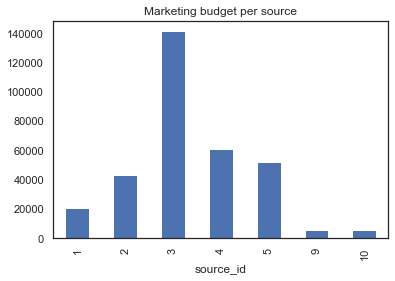

In [40]:
#finding the total money spent
print('Total Marketing budget spent: ',costs['costs'].sum())
#finding per source money spent
per_scource_costs= costs.groupby('source_id')['costs'].sum()
print(per_scource_costs)
plt.title('Marketing budget per source')
per_scource_costs.plot(kind = 'bar',x = 'source_id', y = 'costs')


<div class="alert alert-success">


### Conclusion:
    The marketing budget of source number 3 was the largest 
</div>

## Marketing budget over time:

month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64


<AxesSubplot:title={'center':'Overtime costs'}, xlabel='month'>

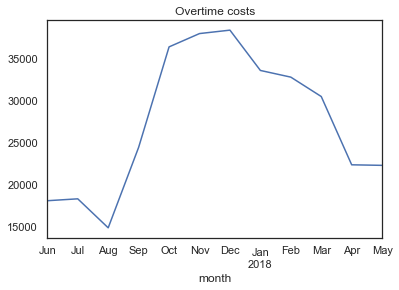

In [41]:
costs_ = costs
costs_['dt'] = pd.to_datetime(costs_['dt'])
costs_['month'] = costs_['dt'].astype('datetime64[M]')
overtime_costs = costs_.groupby('month')['costs'].sum()
print(overtime_costs)
plt.title('Overtime costs')
overtime_costs.plot()

<div class="alert alert-success">


### Conclusions:
    August was the month with the least expnse on marketing
</div>

## How much did customer acquisition from each of the sources cost? <a class="anchor" id="section_3_2"></a>

In [42]:
funnel.head()

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date,session_length_sec,first_visit_date,first_visit_month,visit_month,cohort_lifetime,buy ts,revenue,first_purchase_date,time_taken_to_purchase
0,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440,2018-03-09,2018-03-01,2018-05-01,2,2018-03-09 20:25:00,2.33,2018-03-09,0.0
1,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,1680,2018-03-09,2018-03-01,2018-03-01,0,2018-03-09 20:25:00,2.33,2018-03-09,0.0
2,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-03,2017-09-01,2017-09-01,0,2017-09-04 12:46:00,2.44,2017-09-04,1.0
3,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-03,2017-09-01,2017-09-01,0,2017-10-28 00:01:00,1.53,2017-09-04,1.0
4,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017,9,35,2017-09-03,60,2017-09-03,2017-09-01,2017-09-01,0,2017-10-28 19:16:00,1.53,2017-09-04,1.0


In [43]:
# to answer that question we frst need to understand how much users came from each scource

per_scource_costumer = funnel.groupby('source id').agg({'uid': 'nunique'}).reset_index()
per_scource_costumer.columns = ('source_id', 'costumers')
display(per_scource_costumer)

per_scource_costs.columns = ('source_id', 'costs')
per_scource_costs=per_scource_costs.to_frame()
display(per_scource_costs)

,source_id,costumers
0,1,7138
1,2,7305
2,3,13846
3,4,14253
4,5,10156
5,7,1
6,9,2793
7,10,1773


,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Text(0.5, 1.0, 'CAC per source')

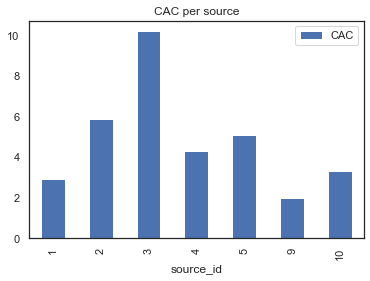

In [44]:
# Now we need to calculate CAC '(Costumer accusition cost)'
Source_CAC = pd.merge(per_scource_costs, per_scource_costumer, on='source_id')
Source_CAC['CAC'] = (Source_CAC['costs'] / Source_CAC['costumers'])
Source_CAC.plot(kind = 'bar',x = 'source_id', y = 'CAC')
plt.title('CAC per source')

<div class="alert alert-success">


### Conclusion: 
    The costiest source per costumer was source number 3 
</div>

## How worthwhile where the investments? (ROI) <a class="anchor" id="section_3_3"></a>

In [45]:
orders.head()

,buy ts,revenue,uid,order_year,order_month,order_week,order_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,2017-06-01,22,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,2017-06-01,22,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,2017-06-01,22,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,2017-06-01,22,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,2017-06-01,22,2017-06-01,2017-06-01


In [46]:
#To calculate ROI we need to see how much we invested in each channel and how much we gained
per_scource_revenue = funnel.groupby('source id').agg({'revenue': 'sum'}).reset_index()
per_scource_revenue.columns = ['source_id', 'revenue']
per_scource_revenue['revenue'] = per_scource_revenue['revenue'].astype('int')

In [47]:

display(per_scource_revenue)

,source_id,revenue
0,1,2298200
1,2,2638189
2,3,296687
3,4,496690
4,5,1181477
5,7,1
6,9,36342
7,10,14619


,source_id,costs,costumers,CAC,revenue,gp,ltv,roi
0,1,20833.27,7138,2.918642,2298200,919280.0,128.786775,44.125574
1,2,42806.04,7305,5.859828,2638189,1055275.6,144.459357,24.652493
2,3,141321.63,13846,10.206676,296687,118674.8,8.571053,0.839750
3,4,61073.60,14253,4.284965,496690,198676.0,13.939241,3.253059
4,5,51757.10,10156,5.096209,1181477,472590.8,46.533163,9.130937
5,9,5517.49,2793,1.975471,36342,14536.8,5.204726,2.634676
6,10,5822.49,1773,3.283976,14619,5847.6,3.298139,1.004313


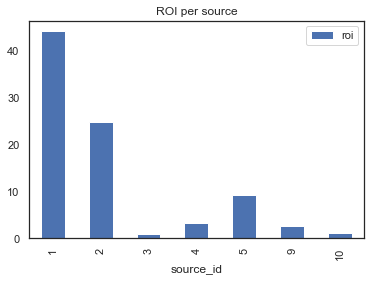

In [48]:
# Now we need to calculate ROI '(Return on investment)
Source_CAC_and_ROI = pd.merge(Source_CAC, per_scource_revenue, on='source_id')
Source_CAC_and_ROI['gp'] = Source_CAC_and_ROI['revenue'] * margin_rate
Source_CAC_and_ROI['ltv'] = Source_CAC_and_ROI['gp'] / Source_CAC_and_ROI['costumers']
Source_CAC_and_ROI['roi'] = Source_CAC_and_ROI['ltv']/ Source_CAC_and_ROI['CAC']
Source_CAC_and_ROI.plot(kind = 'bar',x = 'source_id', y = 'roi')
plt.title('ROI per source')
Source_CAC_and_ROI

<div class="alert alert-success">
    
### Conclusion: 
    Source #1 was the most profitable.
</div>

In [49]:
monthly_costs = costs.groupby('month').sum()


report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_['roi'] = report_['ltv'] / report_['cac']

output = report_.pivot_table(
   index='first_order_month', 
   columns='age', 
   values='roi', 
    aggfunc='mean')

output.cumsum(axis=1) 



age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.530530,0.585030,0.634174,0.741379,0.856205,0.938798,1.045528,1.110838,1.172961,1.240989,1.305138,1.333982
2017-07-01,0.633623,0.668962,0.734697,0.772542,0.791180,0.807631,0.820304,0.835255,0.852253,0.867766,0.884178,NaN
2017-08-01,0.488747,0.532466,0.574934,0.611176,0.656939,0.683202,0.702715,0.740230,0.767297,0.784708,NaN,NaN
2017-09-01,0.597833,0.716200,0.771374,1.192464,1.234889,1.303422,1.377732,1.403485,1.422974,NaN,NaN,NaN
2017-10-01,0.597866,0.661881,0.684749,0.703525,0.721634,0.736016,0.746150,0.759947,NaN,NaN,NaN,NaN
2017-11-01,0.554931,0.597911,0.619394,0.654377,0.670312,0.676112,0.688485,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.542015,0.571800,0.677624,0.799484,0.835281,0.873951,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.416173,0.445835,0.476455,0.490823,0.497132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.463807,0.494855,0.503615,0.511887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
report_.groupby('age')['roi'].mean()

age
0     0.540816
1     0.048968
2     0.043873
3     0.088960
4     0.037225
5     0.036099
6     0.039289
7     0.031465
8     0.031419
9     0.033651
10    0.040281
11    0.028844
Name: roi, dtype: float64

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac,roi
0,2017-06-01,2023,2017-06-01,9557.49,3822.996,0,4.724414,1020,18015.0,8.905091,0.530530
1,2017-06-01,2023,2017-07-01,981.82,392.728,1,0.485329,1020,18015.0,8.905091,0.054500
2,2017-06-01,2023,2017-08-01,885.34,354.136,2,0.437637,1020,18015.0,8.905091,0.049145
3,2017-06-01,2023,2017-09-01,1931.30,772.520,3,0.954671,1020,18015.0,8.905091,0.107205
4,2017-06-01,2023,2017-10-01,2068.58,827.432,4,1.022531,1020,18015.0,8.905091,0.114825


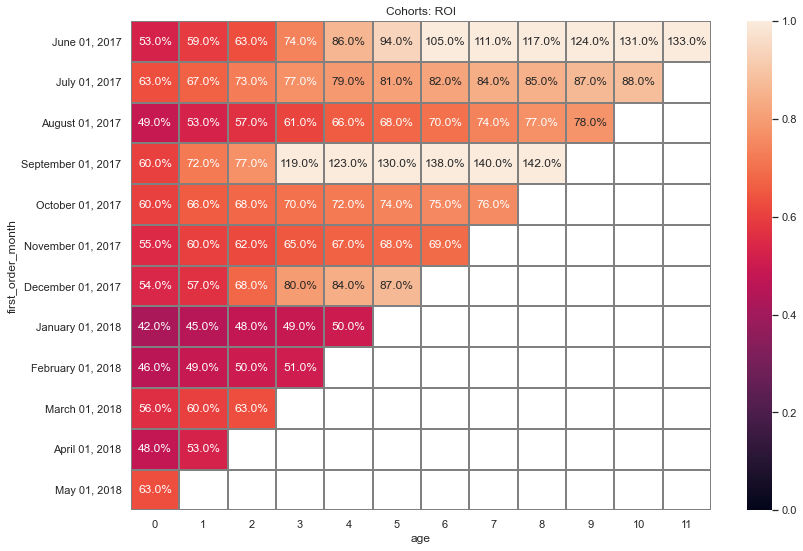

In [51]:
monthly_costs = costs.groupby('month').sum()


roi_report = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
roi_report['cac'] = roi_report['costs'] / roi_report['n_buyers']
roi_report['roi'] = roi_report['ltv'] / roi_report['cac']
display(roi_report.head())

roi_result = roi_report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='roi', 
    aggfunc='mean')

roi_result = roi_result.cumsum(axis = 1).round(2)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROI')
sns.heatmap(roi_result, annot=True, linewidths=1,fmt='.1%',yticklabels =roi_result.index.strftime('%B %d, %Y'), linecolor='gray', vmin=0, vmax=1); 

 

<div class="alert alert-success">
    
### Conclusion: 
    The cohorts who made it through the roi are june in the 7th month, and septembr on the 4rth month.
</div>

## Step 3: General conclusion and recommandations.


<div class="alert alert-warning">

# Summary <a class="anchor" id="chapter3"></a>
---------------------------
    Hi marketing team!
    I took an indepth view on the visits, costs and orders data and i would like to share my insights and
    recomendations with you.

First of all here  are our active users behaviors:
----------------------------------------------------------

Daily Active Users:  <strong>908</strong><br>
Weekly Active Users:  <strong>5825</strong><br>
Monthly Active Users:  <strong>23228</strong><br>

General behavioral data:
-------------------------------------

• Non unique sessions per day: <strong>987</strong><br>
• Avrage sessions by user each day: <b> 1.57</b><br>
• Avarage session length: <strong>00:10:43 (10 minutes and 43 seconds)</strong><br>
• Usualy users come back to the app every  <strong>17.6 days</strong><br>
• Usually, it takes:  <strong>17 days</strong> for users to purchase after regestration<br>
• The avarege numbers of orders a month are:  <strong>4201</strong><br>
• The avarege purchase amount is:  <strong>4.91 USD</strong><br>
• Average LTV for a custumer is: <strong>9.06 USD</strong> 


Marketing Department specific data:
---------------------------------------------
• Total Marketing budget spent:  <strong>329,131.62 USD</strong> <br>
• The marketing budget of source number <strong>3</strong> was the largest<br>
• The costiest source per costumer was source number <strong>3</strong><br>
• Source id #1 had a great succsess! i terms of ROI it hat a Revenue to cost ratio of <strong>10931%</strong><br>
• Source id #2 had a great succsess as well! i terms of ROI it hat a Revenue to cost ratio of <strong>6063%</strong><br>
• Source id #5 was doing well too, i terms of ROI it hat a Revenue to cost ratio of <strong>713%</strong><br>
• Source id #3 is relativly a falior, it has a high costumer accusition cost of 10.2 USD in compare to 2.9 USD of source #1 and its ROI rate is only <strong>109%</strong> (relativly low)<br>
• September 2017 cohort where really profitable in <b>october and december 2017</b>, maybe you guys should look through any changes made and try to learn from it.<br>

I would recommend to focus on the source id's  <strong>1,2 and 5</strong> as i stated in the report.
</div>